# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from Kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications, we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary.

Problem Statement:

Develop a predictive model for used car prices using a vehicle dataset which contains various attributes of the cars. This involves identifying and quantifying the relationships between price and corresponding car attributes such as **mileage, year, make, model, features**. The model needs to evaluate accurately the prices for unseen cars and needs to identify the most dominant features.


### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
df = pd.read_csv('data/vehicles.csv')

# 1. Display basic information
print(df.info())  

# 2. View the first few rows
print(df.head())

# 3. Summary statistics
print(df.describe())

# 4. Check for missing values
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
# Check for numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns
print("Numerical columns:")
numerical_cols

Numerical columns:


Index(['id', 'price', 'year', 'odometer'], dtype='object')

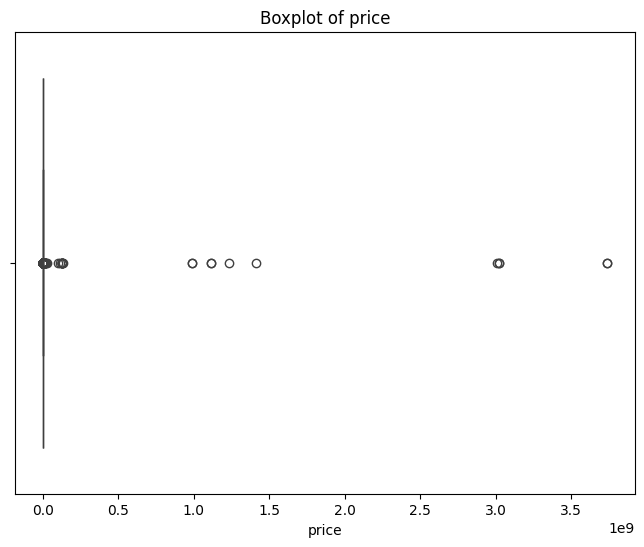

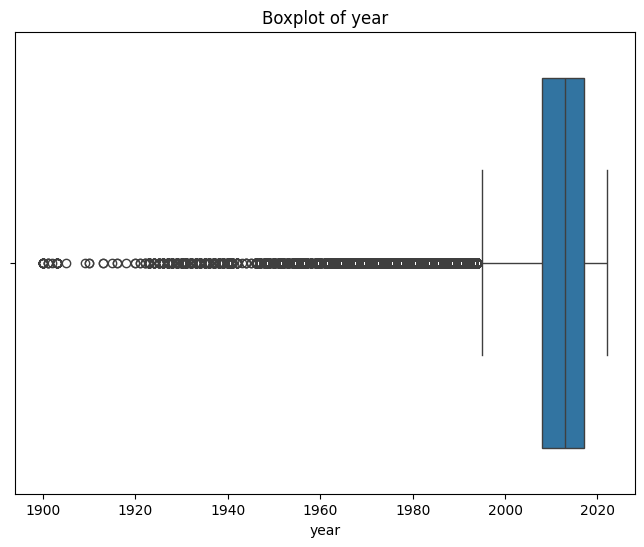

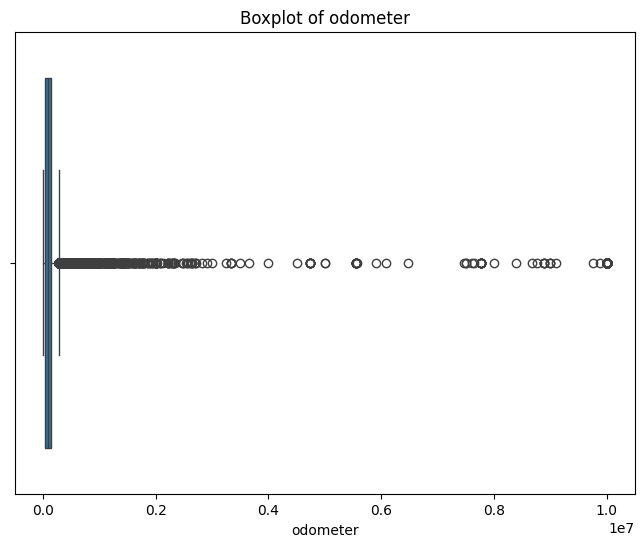

In [ ]:
# Boxplots to visualize potential outliers
numerical_cols = ['price', 'year', 'odometer']

for col in numerical_cols:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

In [ ]:
#Identify typos or inconsistencies in categories.
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    print(f"\nAnalyzing inconsistencies in '{col}':")
    print(df[col].value_counts(dropna=False))
    print(df[col].unique()[:5])


Analyzing inconsistencies in 'region':
region
columbus                   3608
jacksonville               3562
spokane / coeur d'alene    2988
eugene                     2985
fresno / madera            2983
                           ... 
meridian                     28
southwest MS                 14
kansas city                  11
fort smith, AR                9
west virginia (old)           8
Name: count, Length: 404, dtype: int64
['prescott' 'fayetteville' 'florida keys' 'worcester / central MA'
 'greensboro']

Analyzing inconsistencies in 'manufacturer':
manufacturer
ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
NaN                17646
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8


Correlation Matrix:
             price      year  odometer
price     1.000000  0.323616 -0.519599
year      0.323616  1.000000 -0.407711
odometer -0.519599 -0.407711  1.000000


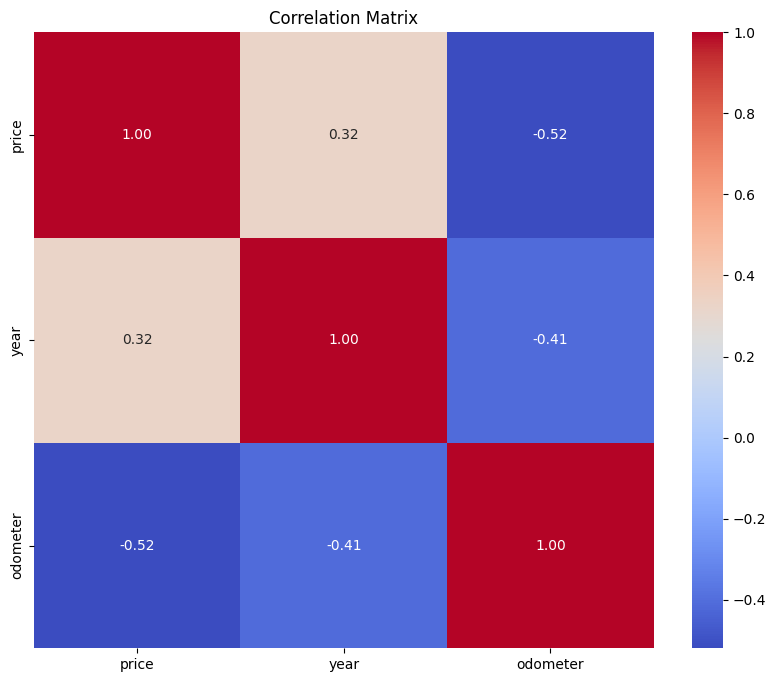

In [ ]:
import matplotlib.pyplot as plt
# Analyze relationships between numerical variables using correlation
correlation_matrix = df[numerical_cols].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

### Data Preparation

After our initial exploration and fine-tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`.

In [7]:
# Fill missing numerical values with the median
for col in ['year', 'odometer']:
    if df[col].isnull().any():
        df[col].fillna(df[col].median(), inplace=True)


<ipython-input-7-2801cb326ef5>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)


In [8]:

# Fill missing categorical values with the mode
for col in ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'paint_color', 'model']:
    if df[col].isnull().any():
        df[col].fillna(df[col].mode()[0], inplace=True)


<ipython-input-8-f54c511d6ac1>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [9]:
# Define a function to cap extreme values
def cap_outliers(series, lower_percentile=1, upper_percentile=99):
    lower_bound = series.quantile(lower_percentile / 100)
    upper_bound = series.quantile(upper_percentile / 100)
    capped_series = series.clip(lower=lower_bound, upper=upper_bound)
    return capped_series

# Apply the function to the 'price' column
df['price'] = cap_outliers(df['price'])

# Apply the function to the 'odometer' column
df['odometer'] = cap_outliers(df['odometer'])


In [ ]:
# Calculate age based on a different year
current_year = 2025
df['age'] = current_year - df['year']

In [11]:
# Drop the unnecessary columns
df.drop(['id', 'VIN', 'size', 'cylinders'], axis=1, inplace=True)

In [13]:
from sklearn.preprocessing import OneHotEncoder

# Select categorical columns to one-hot encode
categorical_cols_to_encode = ['manufacturer', 'condition', 'fuel', 'title_status', 'transmission', 'drive', 'type', 'region']

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)

# Fit the encoder to your categorical features
encoded_features = encoder.fit_transform(df[categorical_cols_to_encode])

# Create a DataFrame with the encoded features
encoded_df = pd.DataFrame(encoded_features, columns=encoder.get_feature_names_out(categorical_cols_to_encode))

# Concatenate the encoded features with your original DataFrame
df = pd.concat([df, encoded_df], axis=1)

# Drop the original categorical columns
df = df.drop(categorical_cols_to_encode, axis=1)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Columns: 489 entries, price to region_zanesville / cambridge
dtypes: float64(485), int64(1), object(3)
memory usage: 1.6+ GB
None


In [ ]:
# Reduce the number of rows
df = df.head(500)
num_rows = len(df)
print(f"Number of rows after reduction: {num_rows}")


Number of rows after reduction: 500


In [ ]:
# Scale numerical features to have a similar range.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numerical_cols_to_scale = ['odometer','age', 'price']
df[numerical_cols_to_scale] = scaler.fit_transform(df[numerical_cols_to_scale])


In [21]:
# Drop all string columns from the DataFrame
string_columns = df.select_dtypes(include=['object']).columns
df = df.drop(columns=string_columns)

print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 486 entries, price to region_zanesville / cambridge
dtypes: float64(486)
memory usage: 1.9 MB
None


In [22]:
# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']


In [ ]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [59]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train different regression models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42),
    "Random Forest Regression": RandomForestRegressor(random_state=42)
}

results = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {"MSE": mse, "R2": r2}
    print(f"{model_name}:")
    print(f"  MSE: {mse}")
    print(f"  R2: {r2}\n")

Linear Regression:
  MSE: 0.03316275320462538
  R2: 0.1870125767485853

Decision Tree Regression:
  MSE: 0.030617895220822134
  R2: 0.24939996425006772

Random Forest Regression:
  MSE: 0.024644395959286306
  R2: 0.3958407540863259



### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high-quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight into drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [61]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for RandomForestRegressor
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Initialize the RandomForestRegressor
random_forest_model = RandomForestRegressor(random_state=42)

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=random_forest_model, param_grid=param_grid, cv=4, scoring='neg_mean_squared_error')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Use the best model to predict on the test data
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R2: {r2}")


MSE: 0.018753392001610466
R2: 0.5402591652587365


In [52]:
import pandas as pd

# Access coefficients for Linear Regression
if "Linear Regression" in models:
    coefficients = models["Linear Regression"].coef_
    intercept = models["Linear Regression"].intercept_

    feature_coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
    feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)
    print("\nLinear Regression Coefficients:")
    print(feature_coefficients)
    print(f"Intercept: {intercept}")

    # Interpretation of coefficients
    print("\nCoefficient Interpretation (Linear Regression):  A higher coefficient indicates a stronger influence on the target variable.")


Linear Regression Coefficients:
                          Feature  Coefficient
14           manufacturer_ferrari     0.639624
401  region_skagit / island / SJI     0.196646
97                  region_auburn     0.153444
105             region_bellingham     0.139799
110             region_birmingham     0.133338
..                            ...          ...
256              region_la crosse    -0.145536
177                region_el paso    -0.152999
69                       type_bus    -0.192960
79                       type_van    -0.259643
1                        odometer    -0.307009

[485 rows x 2 columns]
Intercept: -8.693736915718528

Coefficient Interpretation (Linear Regression):  A higher coefficient indicates a stronger influence on the target variable.


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine-tuning their inventory.